Segmentación un mercado de adolescentes --- 0:00 min
===

* 0:00 min | Ultima modificación: Octubre 13, 2021 | [YouTube]

En este tutorial se aplica el algoritmo K-means para clasificar un grupo de adolecentes con base en sus intéreses, con el fin de diseñar estrategias publicitarias y servicios encaminados a cada grupo de interés.

Descripción del problema
---

Un vendedor desea enviar publicidad electrónica a una población de adolecentes y adultos jóvenes con el fin de maximizar sus ventas. Para ello, desea poder clasificar a sus clientes potenciales por grupos de interés de acuerdo con sus intereses y consecuentemente enviar publicidad específica a cada uno de ellos.   

En este problema se desea determina que grupos de interés existen en una población de clientes a partir de los mensajes enviados por un servicio de redes sociales. La información disponible consiste en 30000 observaciones de 40 variables que podrían caracterizar los intereses de la población analizada. Estas variables corresponden a palabras que pueden asociarse a un interés de la poblaión analizada. Cada variable mide la frecuencia con que una determinada palabra aparece en los mensajes de texto; adicionalmente, dentro de estas variables se incluye  información como el sexo, la edad y la cantidad de contactos de la persona. 

Carga de los datos
---

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/snsdata.csv",
    sep=",",
    thousands=None,
    decimal=".",
    encoding="latin-1",
)

df.head(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Verificación inicial
---

In [2]:
#
# Hay valores nulos en todas las columnas
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

Imputación de la columna age
---

In [3]:
#
# La muestra contiene un rango de edades por fuera de la población de interés.
# El total de datos no coincide con el total de la muestra.
#
df.age.describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

In [4]:
#
# Número de registros con NA
#
df.age.isna().sum()

5086

In [5]:
#
# Se calcula una tabla para determinar la edad promedio por año de graduación
#
df.groupby("gradyear")["age"].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [6]:
#
# Los valores faltantes se llenan con el promedio
# de acuerdo con el año de graduación
#
import numpy as np

mean_age_by_gradyear = df.groupby("gradyear")["age"].mean()
df.age = np.where(np.isnan(df.age), mean_age_by_gradyear[df.gradyear], df.age)

#
# Verificación
#
df.age.isna().sum()

0

Selección de la muestra de interes
---

In [7]:
#
# Se selecciona la muestra de interes ( 13 < age < 21)
#
df = df[(df.age > 13) & (df.age < 21)]
len(df)

29639

Frecuencia de las palabras
----

In [8]:
#
# Columnas en el dataframe
#
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [9]:
#
# Se eliminan las columnas que no se incluiran en el clustering
#
words = df[[col for col in df.columns if col not in ["gradyear", "gender", "age"]]]
words.columns

Index(['friends', 'basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

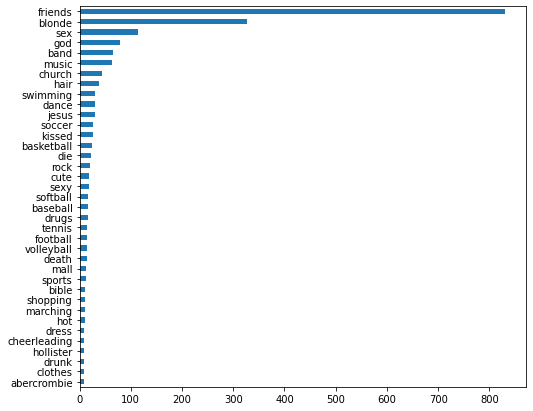

In [11]:
import matplotlib.pyplot as plt

words.max(axis=0).sort_values(ascending=True).plot.barh(figsize=(8, 7))
plt.show()

Preparación de la matriz de documento-termino
---

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(
    norm="l1",
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True,
)

words_tfidf = transformer.fit_transform(words)

In [19]:
words_tfidf = words.applymap(lambda x: 1 if x > 0 else 0)

Clustering
---

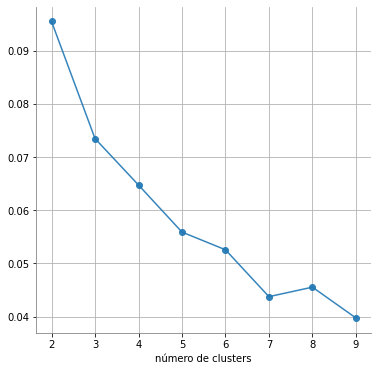

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 10
scores = []

for n in range(2, n_clusters):

    kmeans = KMeans(n_clusters=n)
    kmeans.fit(words_tfidf)
    labels = kmeans.labels_
    scores.append(silhouette_score(words_tfidf, labels, metric="euclidean"))


plt.figure(figsize=(6, 6))
plt.plot(range(2, n_clusters), scores, marker="o", color="tab:blue", alpha=0.9)
plt.xlabel("número de clusters")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()

Interpretabilidad
---

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(words_tfidf)

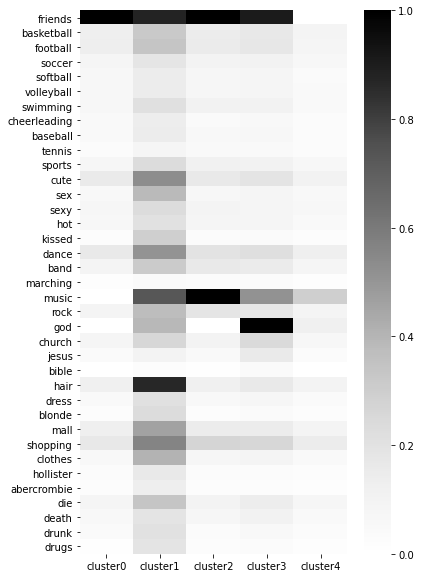

In [26]:
import pandas as pd
import seaborn as sns

clusters_df = pd.DataFrame(
    kmeans.cluster_centers_.T,
    columns=["cluster{}".format(i) for i in range(5)],
    index=df.columns[3:],
)

plt.figure(figsize=(6, 10))
sns.heatmap(clusters_df, cmap="Greys")
plt.show()

Preparación de los datos
---

In [ ]:
#
# Número de registros
#
len(df)

Clustering
---

In [ ]:
#
# Se escala para eliminar problemas asociados a la medida de los datos.
#
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
interests_z = minMaxScaler.fit_transform(interests)


from sklearn.cluster import KMeans

n_clusters = 10
scores = []

for n in range(2, n_clusters):

    kmeans = KMeans(n_clusters=n)
    kmeans.fit(interests_z)
    labels = kmeans.labels_
    scores.append(silhouette_score(interests_z, labels, metric="euclidean"))


plt.figure(figsize=(6, 6))
plt.plot(range(2, n_clusters), scores, marker="o", color="tab:blue", alpha=0.9)
plt.xlabel("número de clusters")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()

In [ ]:
#
# Se separa la información de las palabras relacionadas
# con los intereses del resto de la información
##
interests = df.iloc[:, 4:].copy()
interests.head()

In [ ]:
#
# Se usa el algoritmo para determinar los centros de 5 grupos
#

## Evaluación del modelo

In [ ]:
#
# Número de patrones asignados a cada cluster
#
(pd.DataFrame(df_clusters.predict(interests_z)))[0].value_counts()

In [ ]:
#
# Frecuencia de las palabras en cada cluster
#
df_clusters.cluster_centers_

**Actividad.---** Haga un heatmap para la interpretación de los grupos.

**Actividad.---** Cuál de los clusters anteriores tiene más interés en los deportes?

**Actividad.---** Cuál es el cluster de las princesas?

**Actividad.---** Cuál cluster representa las personas que no hablan o no han posteado sobre sus intereses?

## Análisis del modelo

In [ ]:
#
# Se asigna a cada ejemplo de los datos
# el cluster al que pertenece
#
df["cluster"] = df_clusters.predict(interests_z).tolist()

#
# clusters a los que pertenecen los primeros cinco patrones
#
df[["cluster", "gender", "age", "friends"]].head(5)

In [ ]:
#
# Características demográficas de los clusters.
# Edad por cluster.
#
df.groupby("cluster")["age"].mean()

In [ ]:
#
# Promedio de mujeres por cluster
#

#
# cluster	female
#       1 0.8381171
#       2 0.7250000
#       3 0.8378198
#       4 0.8027079
#       5 0.6994515
#
df.groupby("cluster")["female"].mean()

In [ ]:
for a, b in df.groupby("cluster"):
    print(b["female"].sum())

In [ ]:
#
# Cantidad promedio de amigos por cluster
#
df.groupby("cluster")["friends"].mean()

**Actividad.---** Al analizar las distintas variables presentadas, qué puede inferir de cada cluster?

**Actividad.---** Repita este ejercicio usando clustering jerárquico.